<a href="https://colab.research.google.com/github/Mukesh-5164/Medicine/blob/main/Medicine_Find.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


Saving Medicine.webp to Medicine.webp


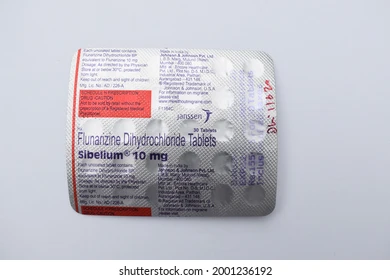

🔍 Detected text:
  

shutterstock.com « 2001236192

No expiry date detected.


In [2]:
# --- Install required libraries ---
!apt install tesseract-ocr -y
!pip install pytesseract pillow opencv-python python-dateutil pandas

# --- Import libraries ---
import pytesseract
from PIL import Image, ImageDraw, ImageFont
import re
from dateutil import parser
import pandas as pd
from datetime import date, timedelta

# --- Step 1: Create or upload sample image ---
# (You can upload your own image using the button)
from google.colab import files
uploaded = files.upload()

# Get uploaded file name
img_path = list(uploaded.keys())[0]
img = Image.open(img_path)
display(img)

# --- Step 2: Extract text using Tesseract OCR ---
text = pytesseract.image_to_string(img)
print("🔍 Detected text:\n", text)

# --- Step 3: Find expiry date pattern ---
expiry = None  # Initialize expiry with a default value
status = "No date detected" # Initialize status with a default value

dates = re.findall(r'\b\d{2}[-/]\d{2}[-/]\d{2,4}\b', text)
if dates:
    expiry = parser.parse(dates[0], dayfirst=True).date()
    today = date.today()
    if expiry > today:
        status = "✅ Valid (can donate)"
    else:
        status = "❌ Expired (cannot donate)"
    print(f"Detected expiry: {expiry} | Status: {status}")
else:
    print("No expiry date detected.")

In [4]:
# Save record to CSV
# Ensure expiry and status are defined, providing defaults if they are not.
if 'expiry' not in globals():
    expiry = None
if 'status' not in globals():
    status = "No date detected"

data = {
    "Medicine": "Paracetamol",
    "Expiry": str(expiry),
    "Status": status
}
df = pd.DataFrame([data])
df.to_csv("donation_records.csv", index=False)
print("Record saved as donation_records.csv")

Record saved as donation_records.csv
